In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ds_utils as ds
import seaborn as sns 

%matplotlib inline


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ds.get_nan_col_proportions(df)

[('LotFrontage', 0.177),
 ('Alley', 0.938),
 ('MasVnrType', 0.005),
 ('MasVnrArea', 0.005),
 ('BsmtQual', 0.025),
 ('BsmtCond', 0.025),
 ('BsmtExposure', 0.026),
 ('BsmtFinType1', 0.025),
 ('BsmtFinType2', 0.026),
 ('Electrical', 0.001),
 ('FireplaceQu', 0.473),
 ('GarageType', 0.055),
 ('GarageYrBlt', 0.055),
 ('GarageFinish', 0.055),
 ('GarageQual', 0.055),
 ('GarageCond', 0.055),
 ('PoolQC', 0.995),
 ('Fence', 0.808),
 ('MiscFeature', 0.963)]

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
numeric_df = df.select_dtypes(include=['float64','int64']).copy()

In [7]:
numeric_df.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [8]:
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
#  OVERALLQUAL & OVERALLCond;   half weighted, or check whats better correlated with sale price, or something
# YEAR BUILT;    into >1946 and <1945 
# IF YearRemodAdd == year built then no remod, then prob assign 1 - hot
# drop: MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, LowQualFinSF, BedroomAbvGr, GarageYrBlt, MoSold, YrSold, 


In [10]:
"""MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
"""

'MSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n'

In [11]:
numeric_df["MSSubClass"].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [12]:
sum(numeric_df["MSSubClass"].value_counts()[:3])/sum(numeric_df["MSSubClass"].value_counts())

0.6705479452054794

In [13]:
#could try1 hot on super broad categories of MSSubClass

In [14]:
numeric_df = numeric_df.drop(columns=["MSSubClass"])

In [15]:
numeric_df["OverallQC"] = (numeric_df["OverallQual"]+numeric_df["OverallCond"])/2

In [16]:
year_remod = np.array(numeric_df["YearRemodAdd"])
year_remod.shape

(1460,)

In [17]:
yr_built = np.array(numeric_df["YearBuilt"])
yr_built.shape

(1460,)

In [18]:
numeric_df["remod"] = [0 if year_remod[i] ==yr_built[i] else 1 for i in range(len(year_remod))]

In [19]:
numeric_df["old"] = [1 if numeric_df["YearBuilt"][i] > 1946 else 0 for i in range(len(yr_built))]

In [20]:
numeric_df["old"].value_counts()

1    1173
0     287
Name: old, dtype: int64

In [21]:
numeric_df["SuperPorch"]= numeric_df["OpenPorchSF"]+ numeric_df["EnclosedPorch"]+ numeric_df["3SsnPorch"] + numeric_df["ScreenPorch"]

In [22]:
numeric_df["BsmtBath"] = numeric_df["BsmtFullBath"]+numeric_df["BsmtHalfBath"]
numeric_df["Bath"] = numeric_df["FullBath"]+numeric_df["HalfBath"]

In [23]:
numeric_df = numeric_df.drop(columns=["LotFrontage","BsmtBath","HalfBath","FullBath","BsmtHalfBath","BsmtFullBath","YearRemodAdd","Id","OpenPorchSF","ScreenPorch","EnclosedPorch","3SsnPorch","ScreenPorch","MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "LowQualFinSF", "BedroomAbvGr", "GarageYrBlt", "MoSold", "YrSold","GarageArea"])


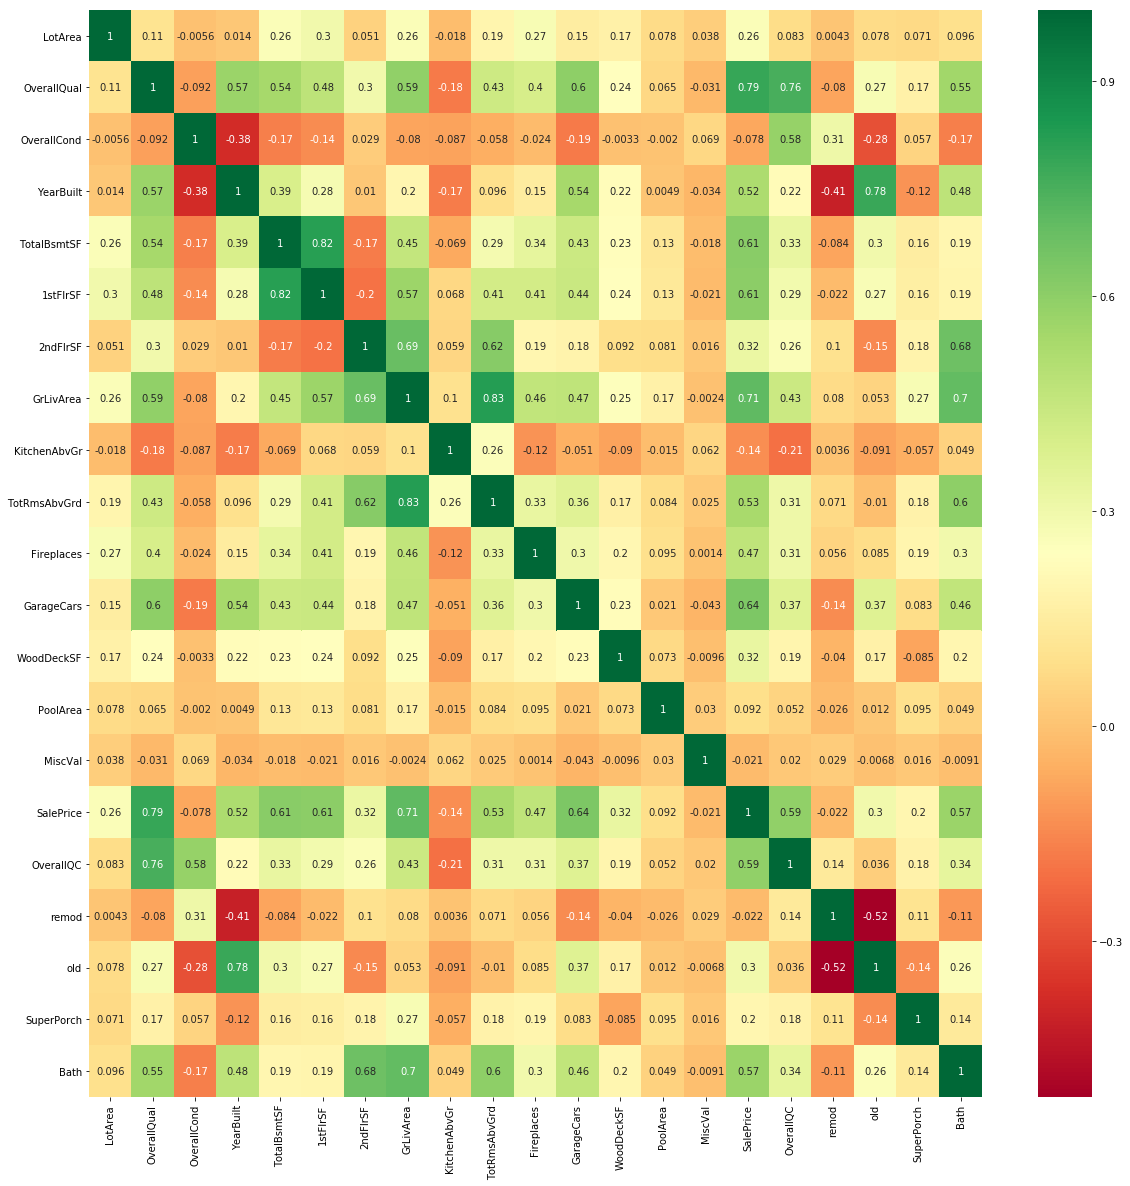

In [24]:
corrmat = numeric_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(numeric_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [25]:
numeric_df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,TotRmsAbvGrd,...,GarageCars,WoodDeckSF,PoolArea,MiscVal,SalePrice,OverallQC,remod,old,SuperPorch,Bath
0,8450,7,5,2003,856,856,854,1710,1,8,...,2,0,0,0,208500,6.0,0,1,61,3
1,9600,6,8,1976,1262,1262,0,1262,1,6,...,2,298,0,0,181500,7.0,0,1,0,2
2,11250,7,5,2001,920,920,866,1786,1,6,...,2,0,0,0,223500,6.0,1,1,42,3
3,9550,7,5,1915,756,961,756,1717,1,7,...,3,0,0,0,140000,6.0,1,0,307,1
4,14260,8,5,2000,1145,1145,1053,2198,1,9,...,3,192,0,0,250000,6.5,0,1,84,3


In [26]:
y = np.array(numeric_df["SalePrice"])
x = np.array(numeric_df.drop(columns=["SalePrice"]))

In [27]:
print(x.shape,y.shape)

(1460, 20) (1460,)
